#**Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,learning_curve,GridSearchCV
from imblearn.combine import SMOTETomek

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#**Loading the dataset**

In [2]:
data = pd.read_csv("/content/train.csv")
data

,Name,Position,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,...,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
0,Brandon Ingram,Small Forward,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,Point Guard,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,Power Forward,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,Small Forward,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,Center,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,Chris Smith,Point Guard,74,15.5,5.5,2.0,5.0,40.6,0.0,0.0,...,2.2,67.5,1.1,2.2,3.3,0.2,0.3,0.7,1.0,0
1288,Brent Price,Point Guard,77,15.1,5.4,2.1,5.0,42.1,0.1,0.4,...,1.5,73.1,0.6,1.5,2.0,1.4,0.6,0.1,1.0,1
1289,Marlon Maxey,Small Forward,51,15.0,4.8,1.9,4.6,41.9,0.0,0.1,...,1.4,65.7,0.9,1.7,2.6,1.2,0.7,0.3,0.9,1
1290,Litterial Green,Point Guard,68,13.0,3.6,1.5,2.5,59.2,0.0,0.0,...,1.3,54.7,1.1,2.3,3.4,0.3,0.3,0.3,0.7,0


#**Data Pre-Processing**

In [3]:
data.shape

(1292, 22)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1292 non-null   object 
 1   Position           1292 non-null   object 
 2   GamesPlayed        1292 non-null   int64  
 3   MinutesPlayed      1292 non-null   float64
 4   PointsPerGame      1292 non-null   float64
 5   FieldGoalsMade     1292 non-null   float64
 6   FieldGoalsAttempt  1292 non-null   float64
 7   FieldGoalPercent   1292 non-null   float64
 8   3PointMade         1292 non-null   float64
 9   3PointAttempt      1292 non-null   float64
 10  3PointPercent      1281 non-null   float64
 11  FreeThrowMade      1292 non-null   float64
 12  FreeThrowAttempt   1292 non-null   float64
 13  FreeThrowPercent   1292 non-null   float64
 14  OffensiveRebounds  1292 non-null   float64
 15  DefensiveRebounds  1292 non-null   float64
 16  Rebounds           1292 

This code uses the **missingno** library to create a matrix visualization of the missing values in the dataset. 
This can help identify any patterns in missing values and allow the user to better understand the data.

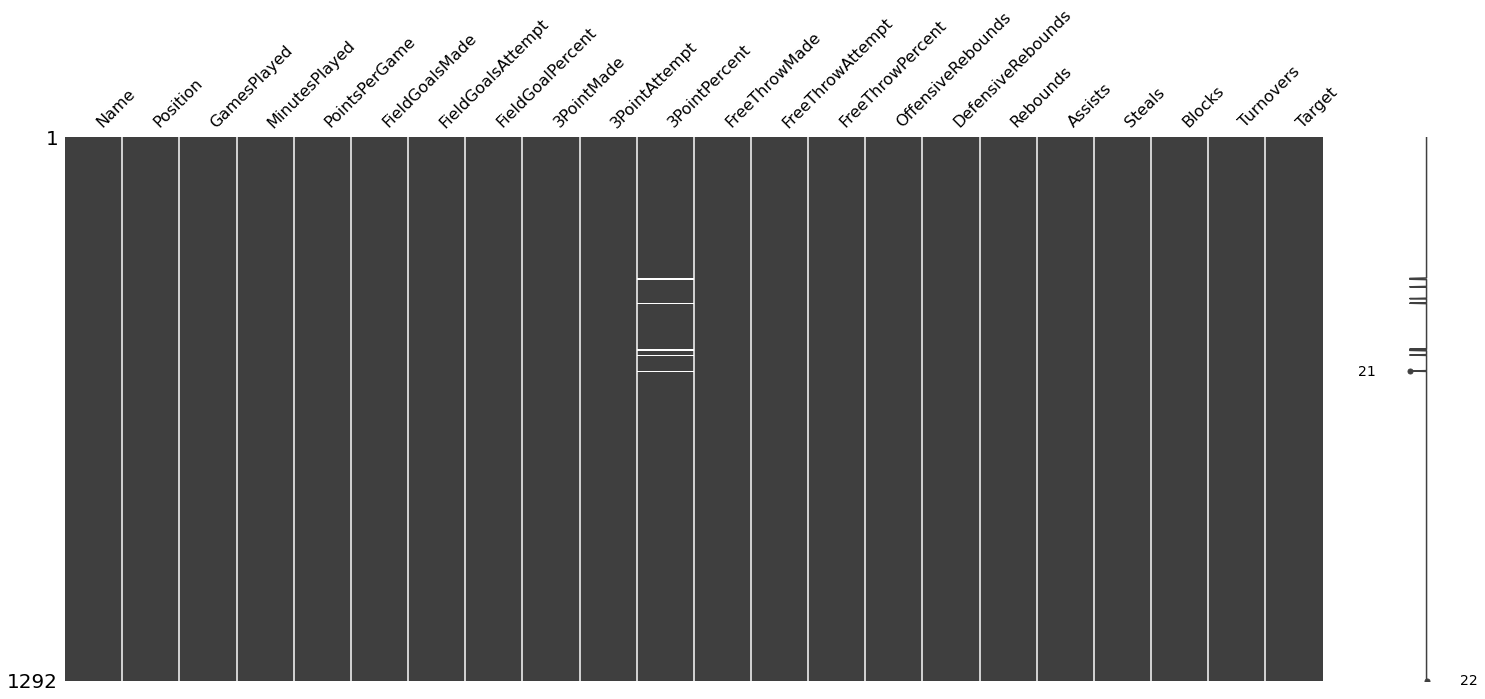

In [5]:
import missingno as msno
msno.matrix(data)

Here, we see some missing values in 3PointPercent

In [6]:
print(data['3PointPercent'].mean())
data['3PointPercent'].fillna(19.32,inplace=True)#handling missing values

19.286104605776735


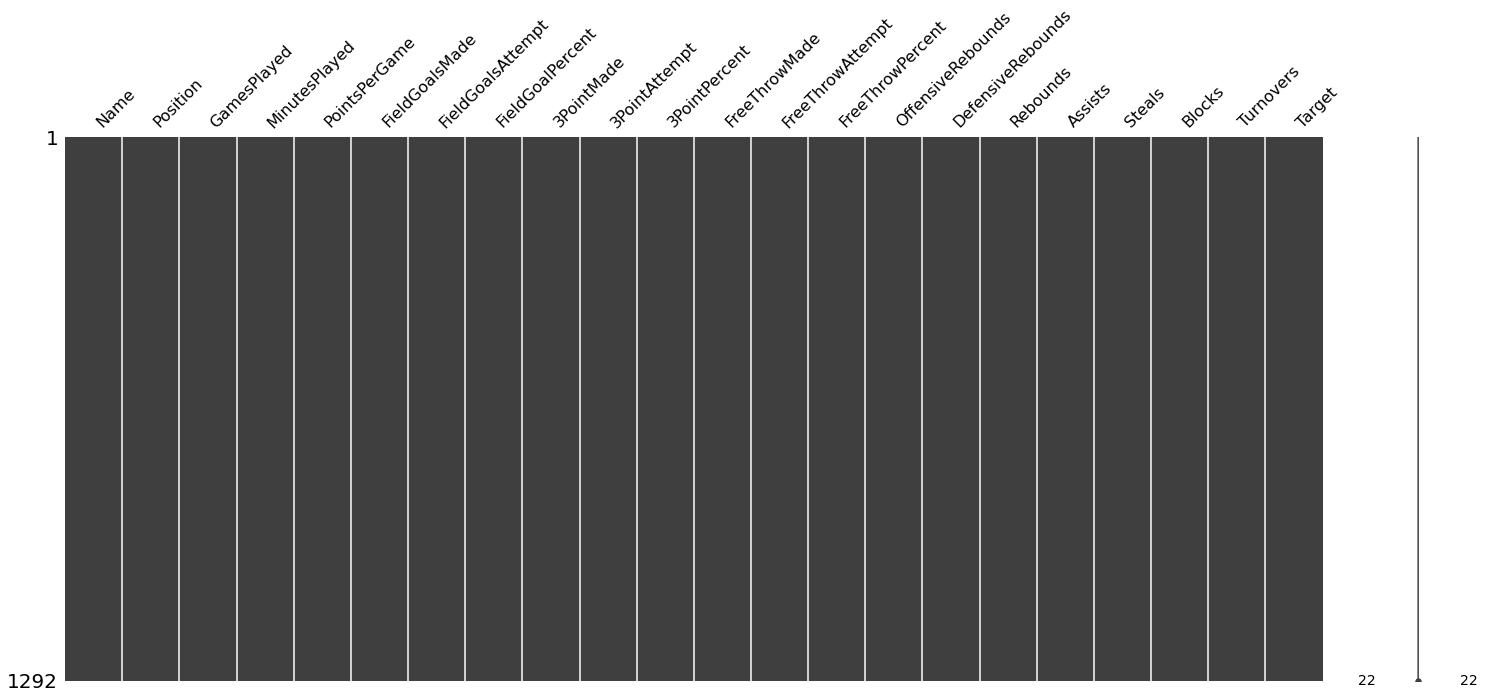

In [7]:
import missingno as msno
msno.matrix(data)

No missing values

In [8]:
#Finding for Duplicate values

data[data.duplicated()].shape[0]

0

No duplicate values

#**EDA**

Overall, for players in all the positions

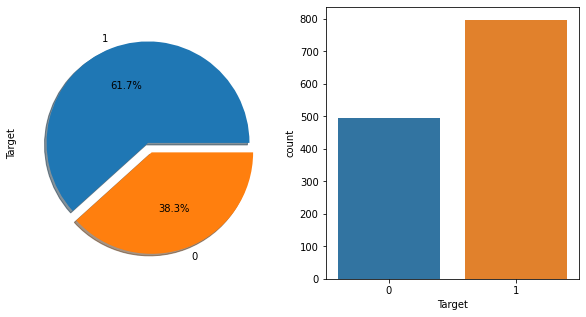

In [9]:
f, ax= plt.subplots(1,2, figsize=(10,5))
data['Target'].value_counts().plot.pie(explode=[0,0.1], shadow=True,ax=ax[0],autopct="%1.1f%%")
sns.countplot(x=data['Target'], ax=ax[1]);


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Kernel Density Estimation**

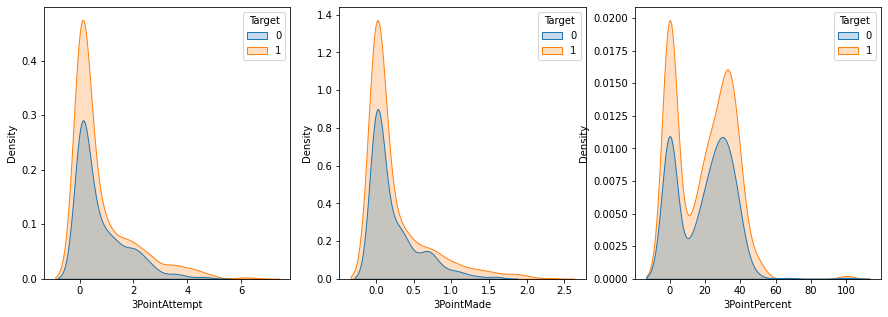

In [11]:
f, ax =plt.subplots(1,3,figsize=(15,5))
sns.kdeplot(data['3PointAttempt'],hue=data['Target'],ax=ax[0],shade=True,)
sns.kdeplot(data['3PointMade'],hue=data['Target'],ax=ax[1],shade=True)
sns.kdeplot(data['3PointPercent'],hue=data['Target'],ax=ax[2],shade=True)
plt.show()

Those with more than 5 years of experience showed a significant difference in 3-point Attempts, Made, Percent

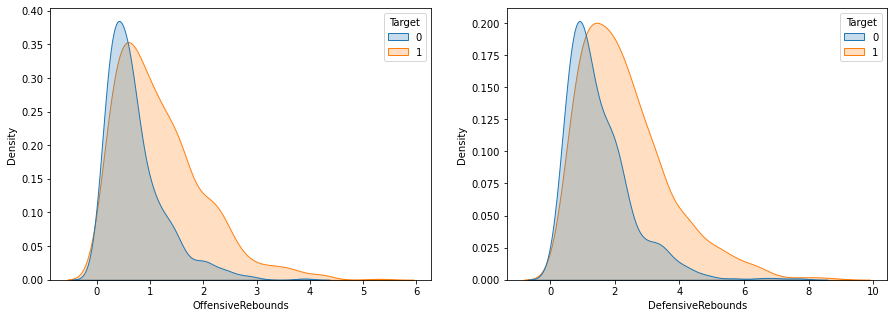

In [12]:
f, ax =plt.subplots(1,2,figsize=(15,5))
sns.kdeplot(data['OffensiveRebounds'],hue=data['Target'],ax=ax[0],shade=True)
sns.kdeplot(data['DefensiveRebounds'],hue=data['Target'],ax=ax[1],shade=True)
plt.show()

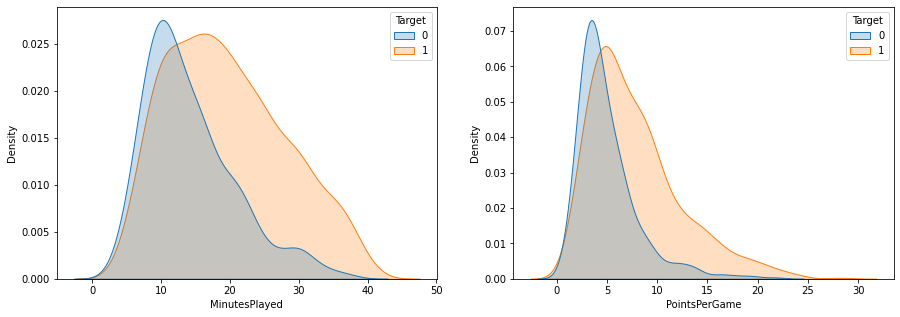

In [13]:
f,ax= plt.subplots(1,2,figsize=(15,5))
sns.kdeplot(data['MinutesPlayed'],hue=data['Target'],ax=ax[0],shade=True)
sns.kdeplot(data['PointsPerGame'],hue=data['Target'],ax=ax[1],shade=True)
plt.show()

Veterans have more play time than amateurs and score more goals per game. But we should note that this analysis is not very helpful.

Each position in basketball is different, and you may not know whether the positions are evenly distributed in the given data. For example, if there are 100 strikers and 80 of them are veterans, of course, the veterans have no choice but to score more.

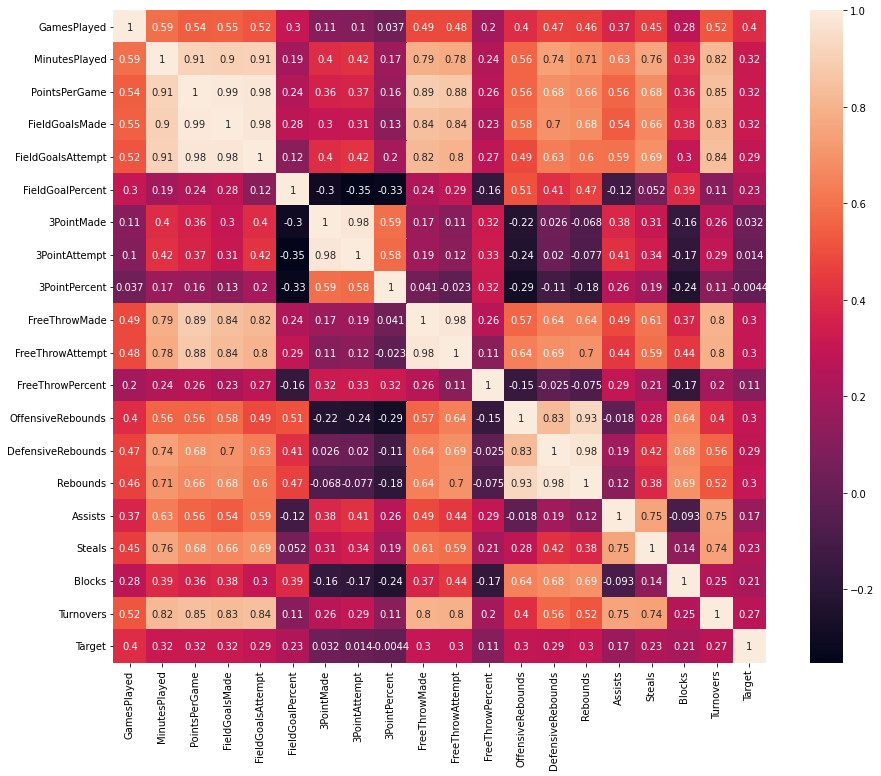

In [14]:
#HeatMap
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(), annot=True, square=True);

**Extracting the dataset for players of that paticular position**

In [15]:
# extract data from the dataset
# extracted_data = data[['Name', 'Position', 'GamesPlayed', 'MinutesPlayed', 'PointsPerGame', 'FieldGoalsMade', 'FieldGoalsAttempt', 'FieldGoalPercent', 'FieldGoalPercent', '3PointMade', '3PointAttempt', '3PointPercent', 'FreeThrowMade', 'FreeThrowAttempt', 'FreeThrowPercent', 'OffensiveRebounds', 'DefensiveRebounds', 'Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers', 'Target']]

# filter the dataset to only show players that play in center position
centers = data[data['Position'] == 'Center']

#store the extracted data in a new dataset
centers.to_csv('Center.csv')

centers = pd.read_csv('Center.csv')

# delete the first column from the dataset
centers = centers.drop(centers.columns[0], axis=1)

centers.head()


,Name,Position,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,...,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
0,Matt Geiger,Center,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
1,Elmore Spencer,Center,44,6.4,2.4,1.0,1.9,53.7,0.0,0.0,...,0.7,50.0,0.4,1.0,1.4,0.2,0.2,0.4,0.6,1
2,Mitch McGary,Center,32,15.2,6.3,2.8,5.2,53.3,0.0,0.1,...,1.3,62.5,1.7,3.5,5.2,0.4,0.5,0.5,1.0,0
3,Stanley Roberts,Center,55,20.3,10.4,4.3,8.1,52.9,0.0,0.0,...,3.6,51.5,2.1,4.1,6.1,0.7,0.4,1.5,1.4,1
4,Rich King,Center,40,5.3,2.2,0.7,1.8,38.0,0.0,0.0,...,1.1,75.6,0.5,0.7,1.2,0.3,0.1,0.1,0.5,0


The most important attribute for a player in the center position in basketball is rebounding. Centers need to be great rebounders in order to help their team get extra possessions and keep the other team from scoring points. Rebounding is a key skill for centers and is often a major factor in deciding who starts and who gets more playing time.

Hence, we'll analyse rebounds center players

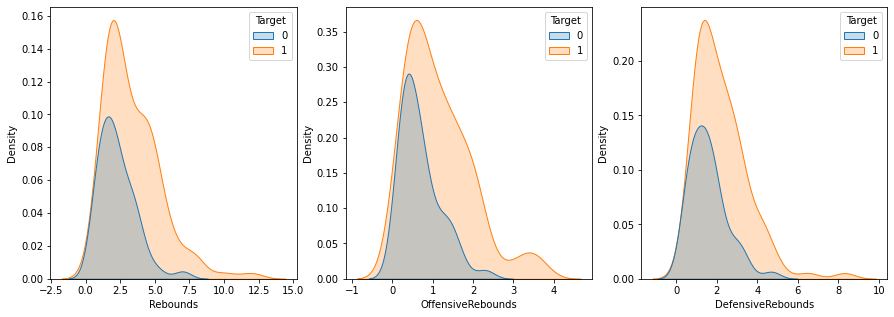

In [16]:
f, ax =plt.subplots(1,3,figsize=(15,5))
sns.kdeplot(centers['Rebounds'],hue=centers['Target'],ax=ax[0],shade=True)
sns.kdeplot(centers['OffensiveRebounds'],hue=centers['Target'],ax=ax[1],shade=True)
sns.kdeplot(centers['DefensiveRebounds'],hue=centers['Target'],ax=ax[2],shade=True)
plt.show()

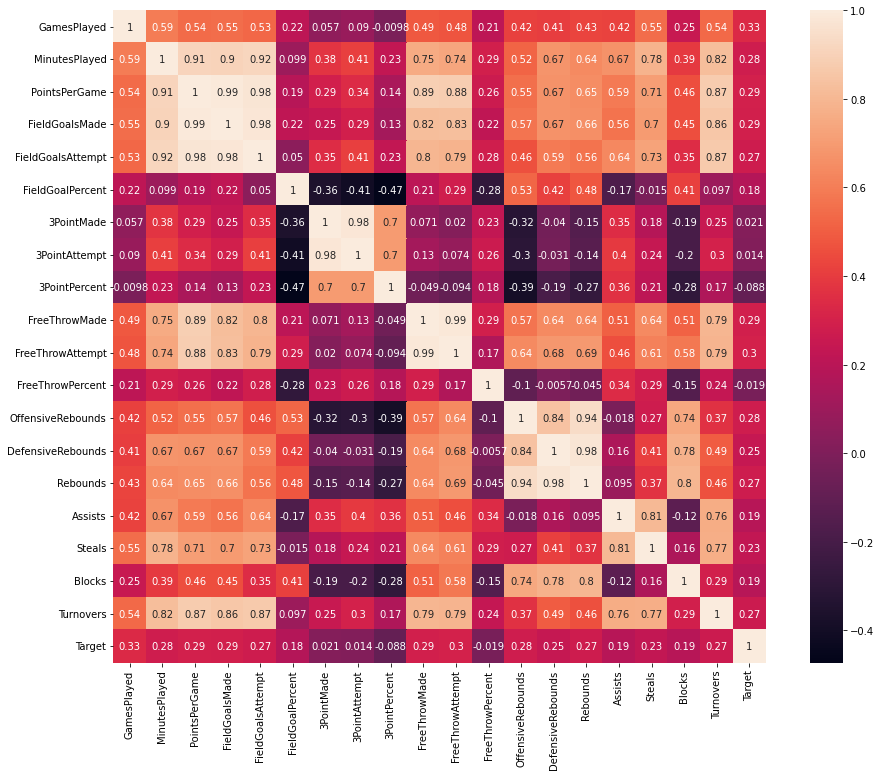

In [17]:
#HeatMap
plt.figure(figsize=(16,12))
sns.heatmap(centers.corr(), annot=True, square=True);

In [18]:
# filter the dataset to only show players that play in Small Forward	 position
Small_Forward = data[data['Position'] == 'Small Forward']

#store the extracted data in a new dataset
Small_Forward.to_csv('Small Forward.csv')

Small_Forward = pd.read_csv('Small Forward.csv')

# delete the first column from the dataset
Small_Forward = Small_Forward.drop(Small_Forward.columns[0], axis=1)

Small_Forward.head()


,Name,Position,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,...,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
0,Brandon Ingram,Small Forward,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Malik Sealy,Small Forward,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
2,Sam Mack,Small Forward,40,6.7,3.6,1.2,3.0,39.8,0.1,0.6,...,1.5,77.6,0.5,0.8,1.2,0.4,0.3,0.1,0.6,1
3,Stephen Howard,Small Forward,49,5.3,2.1,0.7,1.9,37.6,0.0,0.0,...,1.1,64.2,0.5,0.7,1.2,0.2,0.3,0.2,0.5,0
4,Billy Owens,Small Forward,80,31.4,14.3,5.9,11.1,52.5,0.0,0.1,...,3.9,65.4,3.0,5.0,8.0,2.4,1.1,0.8,2.2,1


The main attribute of a basketball player in the small forward position is athleticism. This position requires a player who is agile and has good speed, as well as the ability to make quick decisions and read the court. The small forward should also be able to shoot, pass, and dribble well, as well as have the ability to defend against opponents.

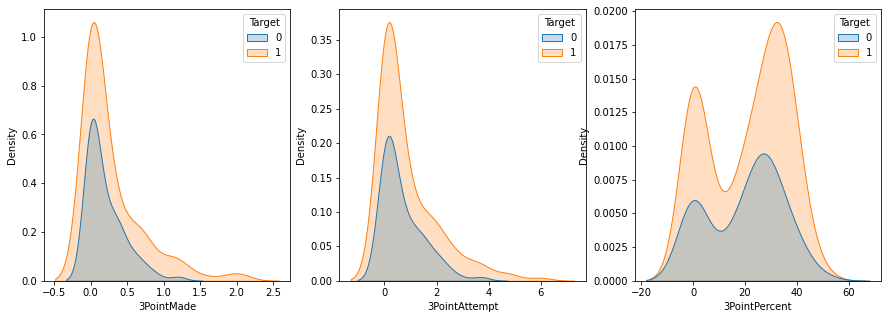

In [19]:
f, ax =plt.subplots(1,3,figsize=(15,5))
sns.kdeplot(Small_Forward['3PointMade'],hue=Small_Forward['Target'],ax=ax[0],shade=True)
sns.kdeplot(Small_Forward['3PointAttempt'],hue=Small_Forward['Target'],ax=ax[1],shade=True)
sns.kdeplot(Small_Forward['3PointPercent'],hue=Small_Forward['Target'],ax=ax[2],shade=True)
plt.show()

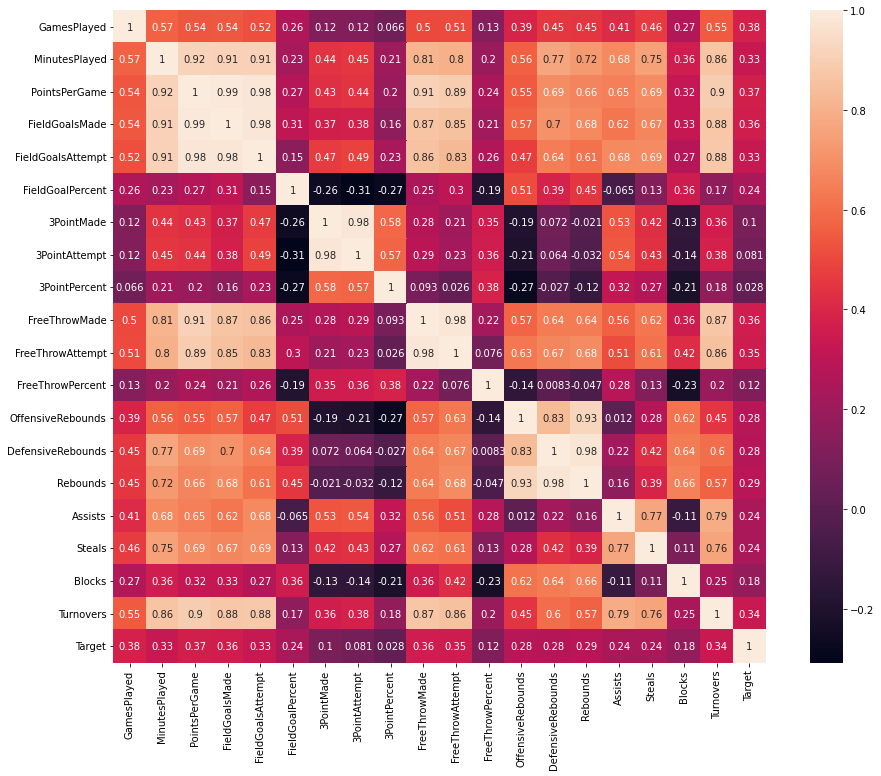

In [20]:
#HeatMap
plt.figure(figsize=(16,12))
sns.heatmap(Small_Forward.corr(), annot=True, square=True);

In [21]:
# filter the dataset to only show players that play in Point Guard position
Point_Guard = data[data['Position'] == 'Point Guard']

#store the extracted data in a new dataset
Point_Guard.to_csv('Point Guard.csv')

Point_Guard = pd.read_csv('Point Guard.csv')

# delete the first column from the dataset
Point_Guard = Point_Guard.drop(Point_Guard.columns[0], axis=1)

Point_Guard.head()


,Name,Position,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,...,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
0,Andrew Harrison,Point Guard,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
1,Tony Bennett,Point Guard,75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,...,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7,0
2,Duane Cooper,Point Guard,65,9.9,2.4,1.0,2.4,39.2,0.1,0.5,...,0.5,71.4,0.2,0.6,0.8,2.3,0.3,0.0,1.1,0
3,Corey Williams,Point Guard,35,6.9,2.3,0.9,2.4,36.5,0.0,0.1,...,0.6,81.8,0.5,0.3,0.9,0.7,0.1,0.1,0.3,0
4,John Crotty,Point Guard,40,6.1,2.6,0.9,1.8,51.4,0.1,0.4,...,1.0,68.4,0.1,0.3,0.4,1.4,0.3,0.0,0.8,1


The main attribute of a basketball player in the **point guard** position is their ability to facilitate the team's offense by controlling the ball and creating scoring opportunities for their teammates. This includes making decisions on when to pass, when to shoot, and when to drive to the basket. Point guards must also be able to defend against their opponents' players and anticipate their opponents' moves so that they can be ready for quick counterattacks.

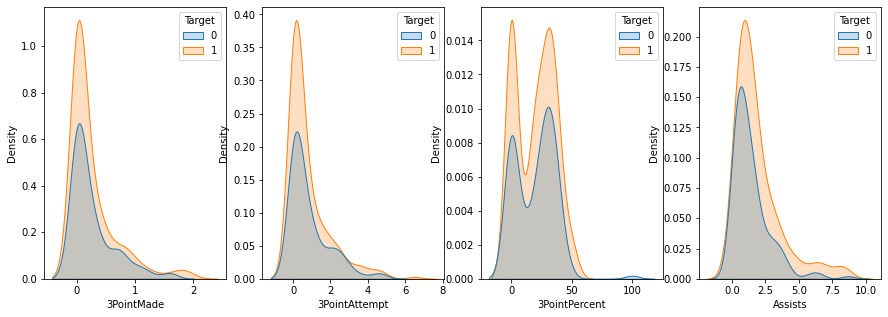

In [22]:
f, ax =plt.subplots(1,4,figsize=(15,5))
sns.kdeplot(Point_Guard['3PointMade'],hue=Point_Guard['Target'],ax=ax[0],shade=True)
sns.kdeplot(Point_Guard['3PointAttempt'],hue=Point_Guard['Target'],ax=ax[1],shade=True)
sns.kdeplot(Point_Guard['3PointPercent'],hue=Point_Guard['Target'],ax=ax[2],shade=True)
sns.kdeplot(Point_Guard['Assists'],hue=Point_Guard['Target'],ax=ax[3],shade=True)
plt.show()

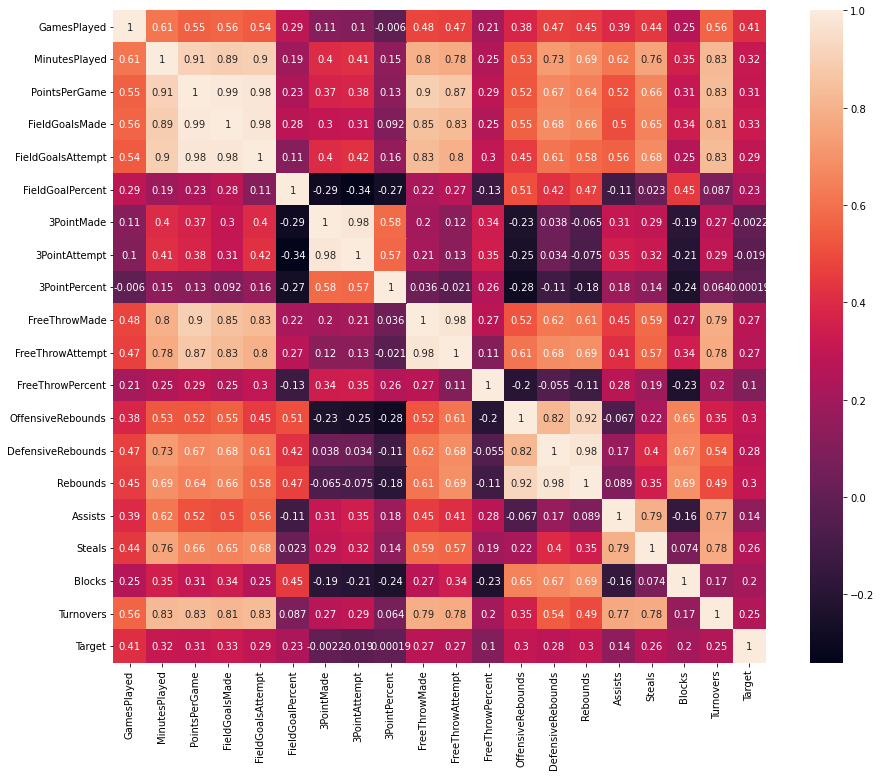

In [23]:
#HeatMap
plt.figure(figsize=(16,12))
sns.heatmap(Point_Guard.corr(), annot=True, square=True);

In [24]:
# filter the dataset to only show players that play in Power Forward	 position
Power_Forward	 = data[data['Position'] == 'Power Forward']

#store the extracted data in a new dataset
Power_Forward	.to_csv('Power Forward.csv')

Power_Forward = pd.read_csv('Power Forward.csv')

# delete the first column from the dataset
Power_Forward = Power_Forward.drop(Power_Forward.columns[0], axis=1)

Power_Forward.head()

,Name,Position,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,...,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
0,JaKarr Sampson,Power Forward,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
1,Don MacLean,Power Forward,62,10.9,6.6,2.5,5.8,43.5,0.0,0.1,...,1.8,81.1,0.5,1.4,2.0,0.6,0.2,0.1,0.7,1
2,Dave Johnson,Power Forward,42,8.5,3.7,1.4,3.5,38.3,0.1,0.3,...,1.4,67.8,0.4,0.7,1.1,0.3,0.2,0.0,0.7,0
3,Lorenzo Williams,Power Forward,27,6.6,1.3,0.6,1.3,47.2,0.0,0.0,...,0.3,28.6,0.6,1.4,2.0,0.2,0.2,0.6,0.3,1
4,Larry Johnson,Power Forward,82,37.2,19.2,7.5,15.3,49.0,0.1,0.3,...,5.0,82.9,3.9,7.0,11.0,3.6,1.0,0.6,1.9,0


The main attribute of a basketball player in power forward position is strength. Power forwards need to be strong and have the ability to battle for rebounds, defend the paint, and score in the post. They also need to have good agility and court awareness.

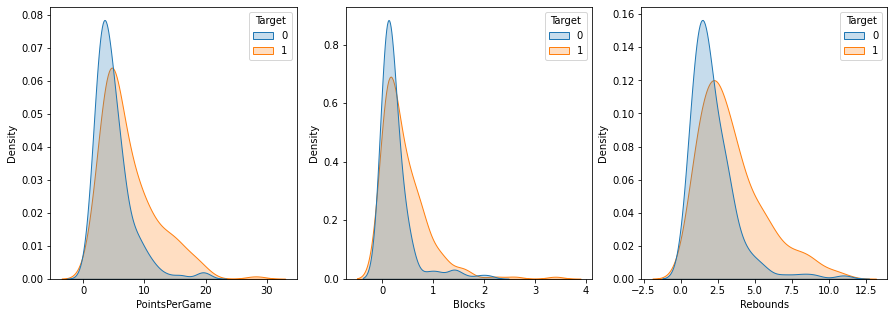

In [25]:
f, ax =plt.subplots(1,3,figsize=(15,5))
sns.kdeplot(Power_Forward['PointsPerGame'],hue=Power_Forward['Target'],ax=ax[0],shade=True)
sns.kdeplot(Power_Forward['Blocks'],hue=Power_Forward['Target'],ax=ax[1],shade=True)
sns.kdeplot(Power_Forward['Rebounds'],hue=Power_Forward['Target'],ax=ax[2],shade=True)

plt.show()

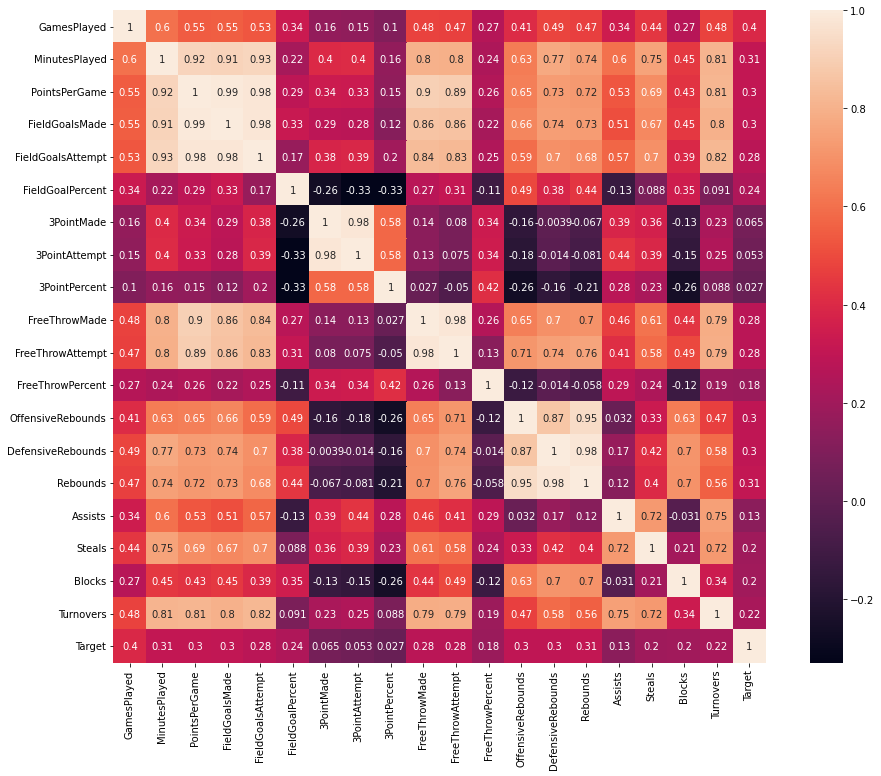

In [26]:
#HeatMap
plt.figure(figsize=(16,12))
sns.heatmap(Power_Forward.corr(), annot=True, square=True);

In [27]:
# filter the dataset to only show players that play in Shooting Guard	 position
Shooting_Guard = data[data['Position'] == 'Shooting Guard']

#store the extracted data in a new dataset
Shooting_Guard.to_csv('Shooting Guard.csv')

Shooting_Guard = pd.read_csv('Shooting Guard.csv')

# delete the first column from the dataset
Shooting_Guard = Shooting_Guard.drop(Shooting_Guard.columns[0], axis=1)

Shooting_Guard.head()

,Name,Position,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,...,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
0,Tracy Murray,Shooting Guard,48,10.3,5.7,2.3,5.4,41.5,0.4,1.5,...,0.8,87.5,0.8,0.9,1.7,0.2,0.2,0.1,0.7,1
1,P.J. Hairston,Shooting Guard,45,15.3,5.6,1.9,6.0,32.3,1.1,3.6,...,0.8,86.1,0.5,1.6,2.0,0.5,0.5,0.3,0.5,0
2,Mark Macon,Shooting Guard,76,30.3,10.6,4.4,11.7,37.5,0.1,0.4,...,2.4,73.0,1.1,1.8,2.9,2.2,2.0,0.2,2.0,1
3,Paul Graham,Shooting Guard,78,22.0,10.1,3.9,8.7,44.7,0.7,1.8,...,2.2,74.1,0.9,2.0,3.0,2.2,1.2,0.3,1.2,0
4,Donald Hodge,Shooting Guard,51,20.7,8.4,3.2,6.4,49.7,0.0,0.0,...,2.9,66.7,2.3,3.1,5.4,0.8,0.5,0.5,1.5,1


The main attribute of a Shooting Guard in basketball is shooting accuracy. Shooting Guards are typically the most prolific scorers on a team and must possess a great shooting touch from both mid-range and long-range distances. Shooting Guards must also be able to create their own shots, as well as drive to the basket for layups and dunks. The ability to penetrate and make plays for teammates is also essential for this position.

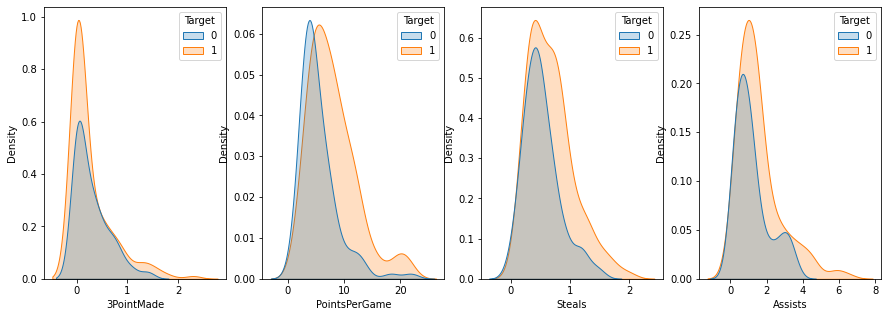

In [28]:
f, ax =plt.subplots(1,4,figsize=(15,5))
sns.kdeplot(Shooting_Guard['3PointMade'],hue=Shooting_Guard['Target'],ax=ax[0],shade=True)
sns.kdeplot(Shooting_Guard['PointsPerGame'],hue=Shooting_Guard['Target'],ax=ax[1],shade=True)
sns.kdeplot(Shooting_Guard['Steals'],hue=Shooting_Guard['Target'],ax=ax[2],shade=True)
sns.kdeplot(Shooting_Guard['Assists'],hue=Shooting_Guard['Target'],ax=ax[3],shade=True)
plt.show()

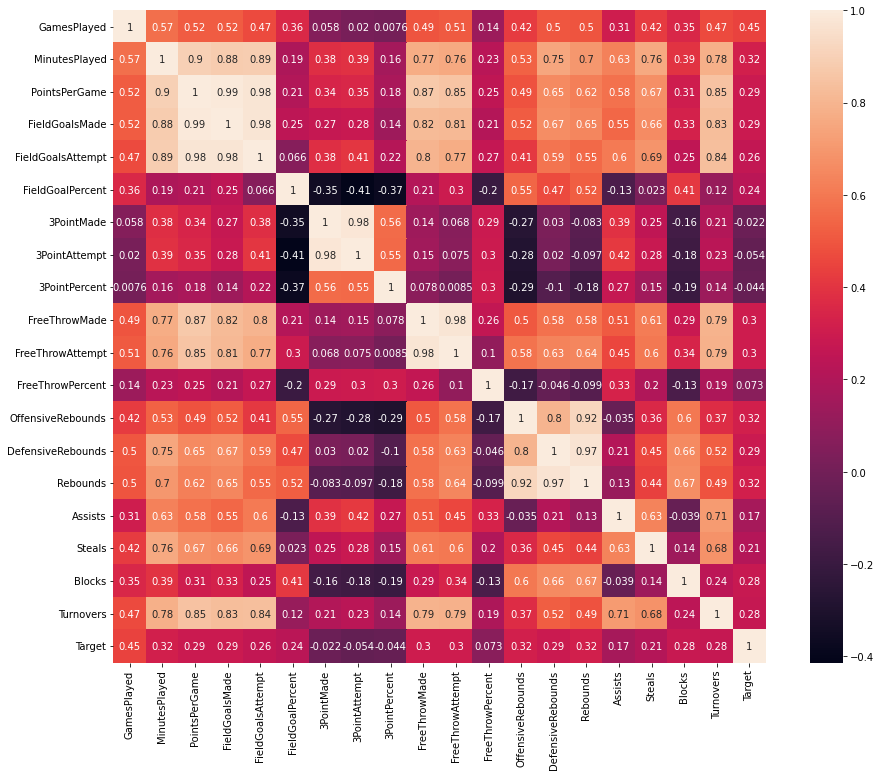

In [29]:
#HeatMap
plt.figure(figsize=(16,12))
sns.heatmap(Shooting_Guard.corr(), annot=True, square=True);

#Modeling

In [30]:
target = data.loc[:,'Target']
train = data.drop(columns=['Target','Name', 'Position'],axis=1)

sample = SMOTETomek(random_state=12)
X_sample,y_sample = sample.fit_resample(train,target)

X_train,X_test,y_train,y_test = train_test_split(X_sample,y_sample,test_size=0.33,random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier()    
}

for name,model in models.items():
    print(f"{name} Acc score: {np.mean(cross_val_score(model,X_train,y_train,cv=5))}")

SVC Acc score: 0.7243395835491557
LogisticRegression Acc score: 0.725318553817466
RandomForestClassifier Acc score: 0.7547912566041646


In [31]:
base_model1 = RandomForestClassifier()
base_model1.fit(X_train,y_train)
print(f"Random Forest Accuracy = {round(base_model1.score(X_test,y_test),2)*100}%")

base_model2 = LogisticRegression()
base_model2.fit(X_train,y_train)
print(f"Logistic Regression Accuracy = {round(base_model2.score(X_test,y_test),2)*100}%")

base_model3 = SVC()
base_model3.fit(X_train,y_train)
print(f"SVC Accuracy = {round(base_model3.score(X_test,y_test),2)*100}%")

Random Forest Accuracy = 77.0%
Logistic Regression Accuracy = 69.0%
SVC Accuracy = 71.0%


In [32]:
target = centers.loc[:,'Target']
train = centers.drop(columns=['Target','Name', 'Position'],axis=1)

sample = SMOTETomek(random_state=12)
X_sample,y_sample = sample.fit_resample(train,target)

X_train,X_test,y_train,y_test = train_test_split(X_sample,y_sample,test_size=0.33,random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier()    
}

base_model1 = RandomForestClassifier()
base_model1.fit(X_train,y_train)
print(f"Random Forest Accuracy = {round(base_model1.score(X_test,y_test),2)*100}%")

base_model2 = LogisticRegression()
base_model2.fit(X_train,y_train)
print(f"Logistic Regression Accuracy = {round(base_model2.score(X_test,y_test),2)*100}%")

base_model3 = SVC()
base_model3.fit(X_train,y_train)
print(f"SVC Accuracy = {round(base_model3.score(X_test,y_test),2)*100}%")

Random Forest Accuracy = 70.0%
Logistic Regression Accuracy = 62.0%
SVC Accuracy = 63.0%


In [33]:
target = Power_Forward.loc[:,'Target']
train = Power_Forward.drop(columns=['Target','Name', 'Position'],axis=1)

sample = SMOTETomek(random_state=12)
X_sample,y_sample = sample.fit_resample(train,target)

X_train,X_test,y_train,y_test = train_test_split(X_sample,y_sample,test_size=0.33,random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier()    
}

base_model1 = RandomForestClassifier()
base_model1.fit(X_train,y_train)
print(f"Random Forest Accuracy = {round(base_model1.score(X_test,y_test),2)*100}%")

base_model2 = LogisticRegression()
base_model2.fit(X_train,y_train)
print(f"Logistic Regression Accuracy = {round(base_model2.score(X_test,y_test),2)*100}%")

base_model3 = SVC()
base_model3.fit(X_train,y_train)
print(f"SVC Accuracy = {round(base_model3.score(X_test,y_test),2)*100}%")

Random Forest Accuracy = 74.0%
Logistic Regression Accuracy = 71.0%
SVC Accuracy = 74.0%


In [34]:
target = Small_Forward.loc[:,'Target']
train = Small_Forward.drop(columns=['Target','Name', 'Position'],axis=1)

sample = SMOTETomek(random_state=12)
X_sample,y_sample = sample.fit_resample(train,target)

X_train,X_test,y_train,y_test = train_test_split(X_sample,y_sample,test_size=0.33,random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier()    
}

base_model1 = RandomForestClassifier()
base_model1.fit(X_train,y_train)
print(f"Random Forest Accuracy = {round(base_model1.score(X_test,y_test),2)*100}%")

base_model2 = LogisticRegression()
base_model2.fit(X_train,y_train)
print(f"Logistic Regression Accuracy = {round(base_model2.score(X_test,y_test),2)*100}%")

base_model3 = SVC()
base_model3.fit(X_train,y_train)
print(f"SVC Accuracy = {round(base_model3.score(X_test,y_test),2)*100}%")

Random Forest Accuracy = 66.0%
Logistic Regression Accuracy = 73.0%
SVC Accuracy = 68.0%


In [35]:
target = Shooting_Guard.loc[:,'Target']
train = Shooting_Guard.drop(columns=['Target','Name', 'Position'],axis=1)

sample = SMOTETomek(random_state=12)
X_sample,y_sample = sample.fit_resample(train,target)

X_train,X_test,y_train,y_test = train_test_split(X_sample,y_sample,test_size=0.33,random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier()    
}

base_model1 = RandomForestClassifier()
base_model1.fit(X_train,y_train)
print(f"Random Forest Accuracy = {round(base_model1.score(X_test,y_test),2)*100}%")

base_model2 = LogisticRegression()
base_model2.fit(X_train,y_train)
print(f"Logistic Regression Accuracy = {round(base_model2.score(X_test,y_test),2)*100}%")

base_model3 = SVC()
base_model3.fit(X_train,y_train)
print(f"SVC Accuracy = {round(base_model3.score(X_test,y_test),2)*100}%")

Random Forest Accuracy = 77.0%
Logistic Regression Accuracy = 76.0%
SVC Accuracy = 77.0%


In [36]:
from sklearn.model_selection import GridSearchCV
target = Point_Guard.loc[:,'Target']
train = Point_Guard.drop(columns=['Target','Name', 'Position'],axis=1)

sample = SMOTETomek(random_state=12)
X_sample,y_sample = sample.fit_resample(train,target)

X_train,X_test,y_train,y_test = train_test_split(X_sample,y_sample,test_size=0.33,random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier()    
}

base_model1 = RandomForestClassifier()
base_model1.fit(X_train,y_train)
print(f"Random Forest Accuracy = {round(base_model1.score(X_test,y_test),2)*100}%")

base_model2 = LogisticRegression()
base_model2.fit(X_train,y_train)
print(f"Logistic Regression Accuracy = {round(base_model2.score(X_test,y_test),2)*100}%")

base_model3 = SVC()
base_model3.fit(X_train,y_train)
print(f"SVC Accuracy = {round(base_model3.score(X_test,y_test),2)*100}%")



Random Forest Accuracy = 78.0%
Logistic Regression Accuracy = 74.0%
SVC Accuracy = 76.0%


#**Optimization**

In [37]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
def ANN(optimizer = 'sgd',neurons=32,batch_size=32,epochs=20,activation='relu',patience=3,loss='categorical_crossentropy'):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(X_train.shape[1],), activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(10,activation='softmax'))  # 10 is the number of classes in the dataset, you can change it based on your dataset
    model.compile(optimizer = optimizer, loss=loss)
    early_stopping = EarlyStopping(monitor="loss", patience = patience)# early stop patience
    history = model.fit(X_train, pd.get_dummies(y_train).values,
              batch_size=batch_size,
              epochs=epochs,
              callbacks = [early_stopping],
              verbose=0) #verbose set to 1 will show the training process
    return model

In [38]:
#Random Forest
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': [10, 20, 30],
    #'max_features': ['sqrt',0.5],
    'max_depth': [17,20,30,50],
    #'min_samples_leaf': [1,2,4,8],
    #"bootstrap":[True,False],
    "criterion":['gini','entropy']
}
clf = RandomForestClassifier(random_state=0)
grid = GridSearchCV(clf, rf_params, cv=3, scoring='accuracy')
grid.fit(X_test,y_test)
print(grid.best_params_)
print("Accuracy:"+ str(grid.best_score_))

{'criterion': 'entropy', 'max_depth': 17, 'n_estimators': 30}
Accuracy:0.7635658914728682


In [39]:
#SVM
from sklearn.model_selection import GridSearchCV
rf_params = {
    'C': [1,10, 100],
    "kernel":['linear','poly','rbf','sigmoid']
}
clf = SVC(gamma='scale')
grid = GridSearchCV(clf, rf_params, cv=3, scoring='accuracy')
grid.fit(X_test,y_test)
print(grid.best_params_)
print("Accuracy:"+ str(grid.best_score_))

{'C': 1, 'kernel': 'rbf'}
Accuracy:0.7787174066243834
